＃ビュッフェ形式を再現してみる

In [5]:
#defining the libraries and the environment variables
import os
from dotenv import load_dotenv
import openai
import pandas as pd
import numpy as np
import re
import random

load_dotenv()

API_KEY = os.environ.get("OPENAI_API_KEY")
openai.api_key = API_KEY

pd.set_option('display.max_colwidth', None)

In [6]:
#define role
attribute_list = ["College student", "Graduate student", "College teacher"]
sex_list = ["male", "female"]
fisique_list = ["fat", "normal", "skinny"]


In [15]:
prompt="During a lunch break, you are in the college cafeteria where various meal options are available. Please choose your lunch.\n\
When responding, please consider each option independently to ensure your selection is based solely on your preference."

In [8]:
choice_1 = "Dynamite chili and tangy lime-seasoned beets\n"
choice_2 = "Beets\n"
choice_3 = "Lighter-choice beets with no added sugar\n"
choice_4 = "High-antioxidant beets\n"

choice_list = [choice_1, choice_2, choice_3, choice_4]

In [10]:
#food of buffet
class_1 = "Main dish\n"
class_2 = "Side dish, Salad\n"
class_3 = "Rice\n"
class_4 = "Noodles\n"
#Main dish
food_1_1 = "Deep-fried succulent chicken\n"#手仕込みジューシー唐揚げ
food_1_2 = "Hamburger steak with arrabbiata sauce\n"#スパイシートマトハンバーグ
food_1_3 = "Grilled chicken with salt-based sauce\n"#グリルチキン（塩だれ）
food_1_4 = "Salt-grilled mackerel\n"#さば塩焼き
#Side dish, Salad
food_2_1 = "French fries Spicy\n"#フライドポテト（スパイシー）
food_2_2 = "Soft-boiled egg\n"#温泉たまご
food_2_3 = "Boiled spinach with dried bonito\n"#ほうれん草のおひたし
food_2_4 = "Soy sauce taste boiled dried daikon radish strips\n"#切り干し大根
food_2_5 = "Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n"#ツナサラダ
food_2_6 = "Macaroni and corn salad (with wakame seaweed and shredded cabbage)\n"#マカロニ＆コーンサラダ
#Rice
food_3_1 = "(Small size) Rice\n"#ごはん(小)
food_3_2 = "(Medium size) Rice\n"#ごはん(中)
food_3_3 = "(Large size) Rice\n"#ごはん(大)
#Noodles
food_4_1 = "Plain udon noodles\n"#かけうどん
food_4_2 = "Zaru soba cool soba noodles\n"#ざるそば
food_4_3 = "Ramen in soy-sauce flavored soup\n"#醤油ラーメン



In [16]:
def generate_buffet_prompt():
    choice_1 = "Dynamite chili and tangy lime-seasoned beets\n"
    choice_2 = "Beets\n"
    choice_3 = "Lighter-choice beets with no added sugar\n"
    choice_4 = "High-antioxidant beets\n"

    choice_list = [choice_1, choice_2, choice_3, choice_4]

    #food of buffet
    class_1 = "Main dish\n"
    class_2 = "Side dish, Salad\n"
    class_3 = "Rice\n"
    class_4 = "Noodles\n"
    #Main dish
    food_1_1 = "Deep-fried succulent chicken\n"#手仕込みジューシー唐揚げ
    food_1_2 = "Hamburger steak with arrabbiata sauce\n"#スパイシートマトハンバーグ
    food_1_3 = "Grilled chicken with salt-based sauce\n"#グリルチキン（塩だれ）
    food_1_4 = "Salt-grilled mackerel\n"#さば塩焼き
    #Side dish, Salad
    food_2_1 = "French fries Spicy\n"#フライドポテト（スパイシー）
    food_2_2 = "Soft-boiled egg\n"#温泉たまご
    food_2_3 = "Boiled spinach with dried bonito\n"#ほうれん草のおひたし
    food_2_4 = "Soy sauce taste boiled dried daikon radish strips\n"#切り干し大根
    food_2_5 = "Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n"#ツナサラダ
    food_2_6 = "Macaroni and corn salad (with wakame seaweed and shredded cabbage)\n"#マカロニ＆コーンサラダ
    #Rice
    food_3_1 = "(Small size) Rice\n"#ごはん(小)
    food_3_2 = "(Medium size) Rice\n"#ごはん(中)
    food_3_3 = "(Large size) Rice\n"#ごはん(大)
    #Noodles
    food_4_1 = "Plain udon noodles\n"#かけうどん
    food_4_2 = "Zaru soba cool soba noodles\n"#ざるそば
    food_4_3 = "Ramen in soy-sauce flavored soup\n"#醤油ラーメン

    choice = random.choice(choice_list)
    
    buffet_prompt =f"{class_1}1. {food_1_1}2. {food_1_2}3. {food_1_3}4. {food_1_4}\n\
        {class_2}0.{choice}1. {food_2_1}2. {food_2_2}3. {food_2_3}4. {food_2_4}5. {food_2_5}6. {food_2_6}\n\
        {class_3}1. {food_3_1}2. {food_3_2}3. {food_3_3}\n\
        {class_4}1. {food_4_1}2. {food_4_2}3. {food_4_3}\n"
    return buffet_prompt,choice

In [17]:
def generate_completion(role, choice, prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4-turbo-2024-04-09",
        #model="gpt-3.5-turbo-1106",
        messages=[
            {"role": "system", "content": role},
            {"role": "user", "content": f"{prompt},{choice}"}
        ],
        temperature=0.7,
        max_tokens=100,
        )
    return response

In [4]:
import re
content = "0123456789"
numbers = re.findall(r'0', content)
print(numbers)

['0']


In [18]:
def buffet_vegetable_preference(prompt,range_number):
    df = pd.DataFrame()
    
    for i in range(range_number):
        attribute = "college student"
        #attribute = random.choice(attribute_list)

        role = f"you are {attribute}."
        #you have to behave like {attribute}."

        buffet_prompt, selected_choice = generate_buffet_prompt()

        response = generate_completion(role, buffet_prompt, prompt)
        content = response.choices[0].message.content

        #extract number from responce
        numbers = re.findall(r'0', content)
        vegetable_selected = True if numbers else None
        df_sample = pd.DataFrame({"attribute":attribute,"response":content,"number":vegetable_selected,"selected_vegetable":selected_choice},index=[0])

        df = pd.concat([df,df_sample],ignore_index=True)
    return df

In [19]:
df_1 = buffet_vegetable_preference(prompt,10)
#df_2 = buffet_vegetable_preference(choice_2,prompt,50)

In [20]:
df_1.head(10)

attribute   
0  college student  \
1  college student   
2  college student   
3  college student   
4  college student   
5  college student   
6  college student   
7  college student   
8  college student   
9  college student   

                                                                                                                                                                                                                                                                                                                                                                                                                     response   
0                                           For my lunch, I would choose:\n\n**Main Dish:**\n3. Grilled chicken with salt-based sauce\n\n**Side Dish, Salad:**\n5. Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n\n**Rice:**\n2. (Medium size) Rice\n\n**Noodles:**\n2. Zaru soba cool soba noodles\n\nThis combination sounds delicious and balanced, with a good mix of proteins, carbs, and veggies!  \
1                                                                                         For my lunch today, I'll choose:\n\n**Main Dish:**\n3. Grilled chicken with salt-based sauce\n\n**Side Dish, Salad:**\n5. Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n\n**Rice:**\n2. (Medium size) Rice\n\n**Noodles:**\n2. Zaru soba cool soba noodles\n\nThis combination sounds balanced and delicious!   
2                         For my lunch, I would choose:\n\n**Main Dish:**\n3. Grilled chicken with salt-based sauce\n\n**Side Dish, Salad:**\n5. Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n\n**Rice:**\n2. (Medium size) Rice\n\n**Noodles:**\n2. Zaru soba cool soba noodles\n\nThese choices seem balanced between protein, vegetables, and carbs, and provide a variety of flavors and textures.   
3                                                                       For my lunch, I'll go with the following choices:\n\n**Main Dish:**\n3. Grilled chicken with salt-based sauce\n\n**Side Dish, Salad:**\n5. Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n\n**Rice:**\n1. (Small size) Rice\n\n**Noodles:**\n2. Zaru soba cool soba noodles\n\nThis combination sounds nutritious and delicious!   
4                                                           For my lunch today, I’d like to choose:\n\n**Main dish:** 3. Grilled chicken with salt-based sauce\n\n**Side dish, Salad:** 5. Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n\n**Rice:** 2. (Medium size) Rice\n\n**Noodles:** 2. Zaru soba cool soba noodles\n\nThis combination sounds healthy and satisfying, perfect for a midday meal!   
5                            For my lunch today, I'll go with:\n\n**Main dish:**\n3. Grilled chicken with salt-based sauce \n\n**Side dish, Salad:**\n5. Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n\n**Rice:**\n2. (Medium size) Rice\n\n**Noodles:**\n2. Zaru soba cool soba noodles\n\nThis combination seems both nutritious and delicious, perfect for getting me through the rest of my day at   
6                                                                                                  For my lunch today, I'll choose the following:\n\n- **Main Dish:** Grilled chicken with salt-based sauce\n- **Side Dish, Salad:** French fries Spicy\n- **Rice:** (Medium size) Rice\n- **Noodles:** Ramen in soy-sauce flavored soup\n\nThis combination sounds delicious and filling, perfect for a busy day of classes!   
7        For my lunch, I would choose:\n\n**Main dish:** Grilled chicken with salt-based sauce\n\n**Side dish:** Tuna salad (with boiled egg, wakame seaweed, and shredded cabbage)\n\n**Rice:** (Medium size) Rice\n\n**Noodles:** Zaru soba cool soba noodles\n\nThis combination offers a balanced meal with protein, vegetables, and a moderate amount of carbohydrates, perfect for refueling during a busy college day.   
8            

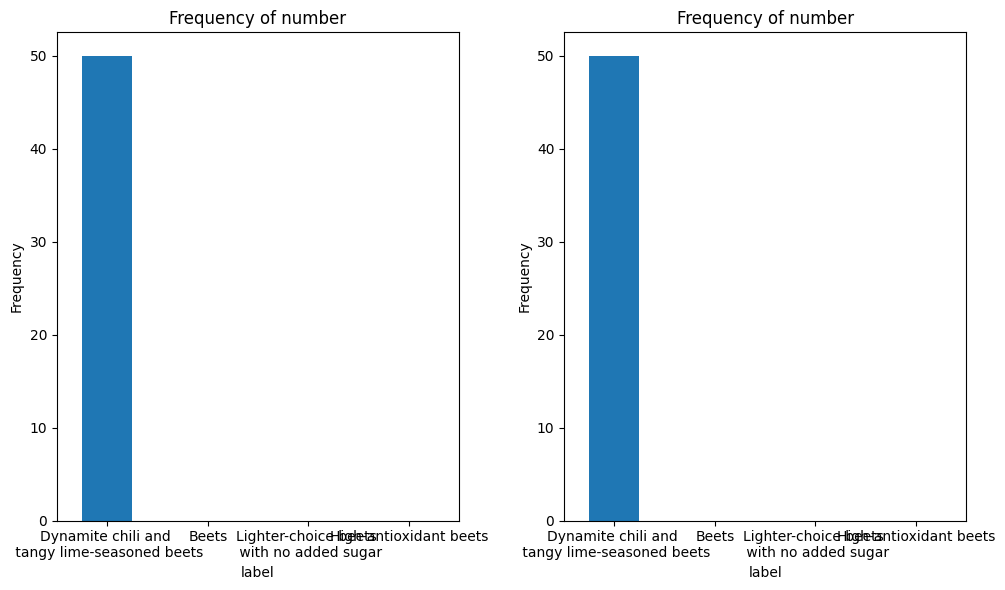

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define dictionaries to map numeric values to descriptive labels
choice_1_dic = {
    1: "Dynamite chili and \n tangy lime-seasoned beets",
    2: "Beets",
    3: "Lighter-choice beets \n with no added sugar",
    4: "High-antioxidant beets"
}

choice_2_dic = {
    1:"Beets",
    2:"Dynamite chili and \n tangy lime-seasoned beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"High-antioxidant beets"
}


choice_3_dic = {
    1:"Higher-antioxidant beets",
    2:"Beets",
    3:"Lighter-choice beets \n with no added sugar",
    4:"Dynamite chili and \n tangy lime-seasoned beets"
}

column = "number"

# Define a function to plot frequency of numbers associated with descriptive labels
def plot_frequency(df,column,choice_dic, ax):
    frequency = df[column].value_counts().sort_index()
    frequency.index = frequency.index.map(lambda x: choice_dic[x])
    desired_order = list(choice_1_dic.values())
    frequency = frequency.reindex(desired_order)
    frequency.plot(kind='bar', ax=ax)
    ax.set_xlabel('label')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {column}')
    ax.tick_params(axis='x', rotation=0)

# Create DataFrame 1 (df_1) and DataFrame 2 (df_2) before calling this function

# Plot frequency for DataFrame 1
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(1, 3, 1)
plot_frequency(df_1, column,choice_1_dic, ax1)

# Plot frequency for DataFrame 2
ax2 = plt.subplot(1, 3, 2)
plot_frequency(df_2, column,choice_2_dic, ax2)

#ax3 = plt.subplot(1, 3, 3)
#plot_frequency(df_3, column,choice_3_dic, ax3)

plt.tight_layout()
plt.show()
